In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_sales = pd.read_csv(r"C:\Users\HP\Downloads\Diwali Sales Data.csv",encoding = 'unicode_escape')

In [3]:
df_sales.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
# Remove some unuseful columns from data set like Status, unnamed1;
df_sales.drop(["Status","unnamed1"], axis =1, inplace = True)

In [5]:
df_sales.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [6]:
df_sales.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
# Handle missing Values in data set
df_sales.dropna(inplace= True)

In [8]:
df_sales['Amount']= df_sales['Amount'].astype('int')

In [9]:
df_sales.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [10]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [11]:
# Now question comes , which gender do more purchasing

In [12]:
df_sales['Gender'].value_counts()

Gender
F    7832
M    3407
Name: count, dtype: int64

In [13]:
# I want to plot these Gender count data

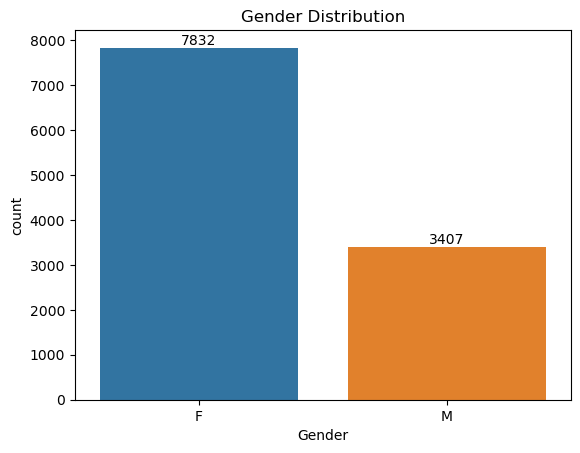

In [14]:
ax= sns.countplot(x ='Gender', data = df_sales)
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title('Gender Distribution')

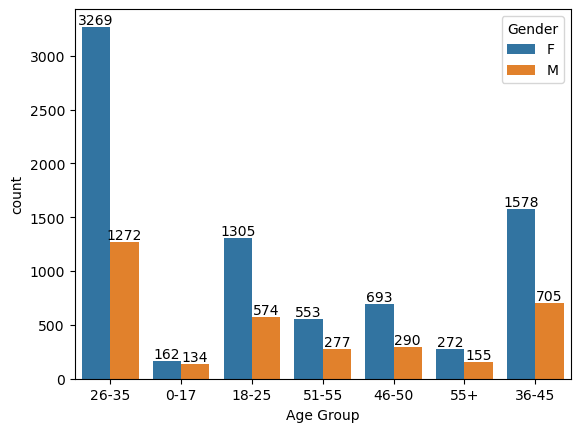

In [15]:
# Which age group do more shopping 
ax= sns.countplot(x='Age Group',data = df_sales, hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Age Group Vs Amount')

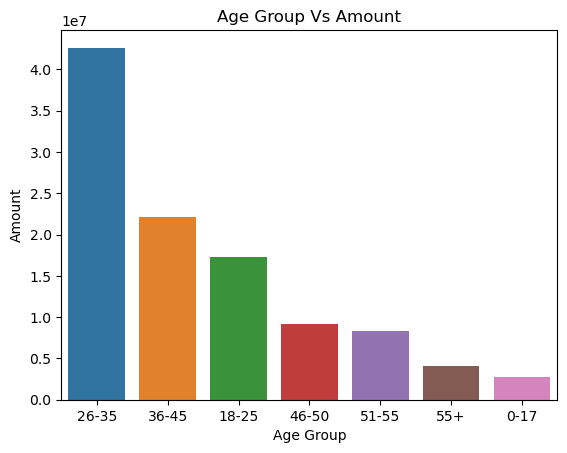

In [16]:
# We can say that Females buy more products than Men in every Age Group
sales_age =df_sales.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by ='Amount', ascending = False)
sns.barplot(x= 'Age Group', y = 'Amount', data = sales_age)
plt.title('Age Group Vs Amount')

In [17]:
# Most of the buyers are lie in age between (26-35)





<Axes: xlabel='State', ylabel='Amount'>

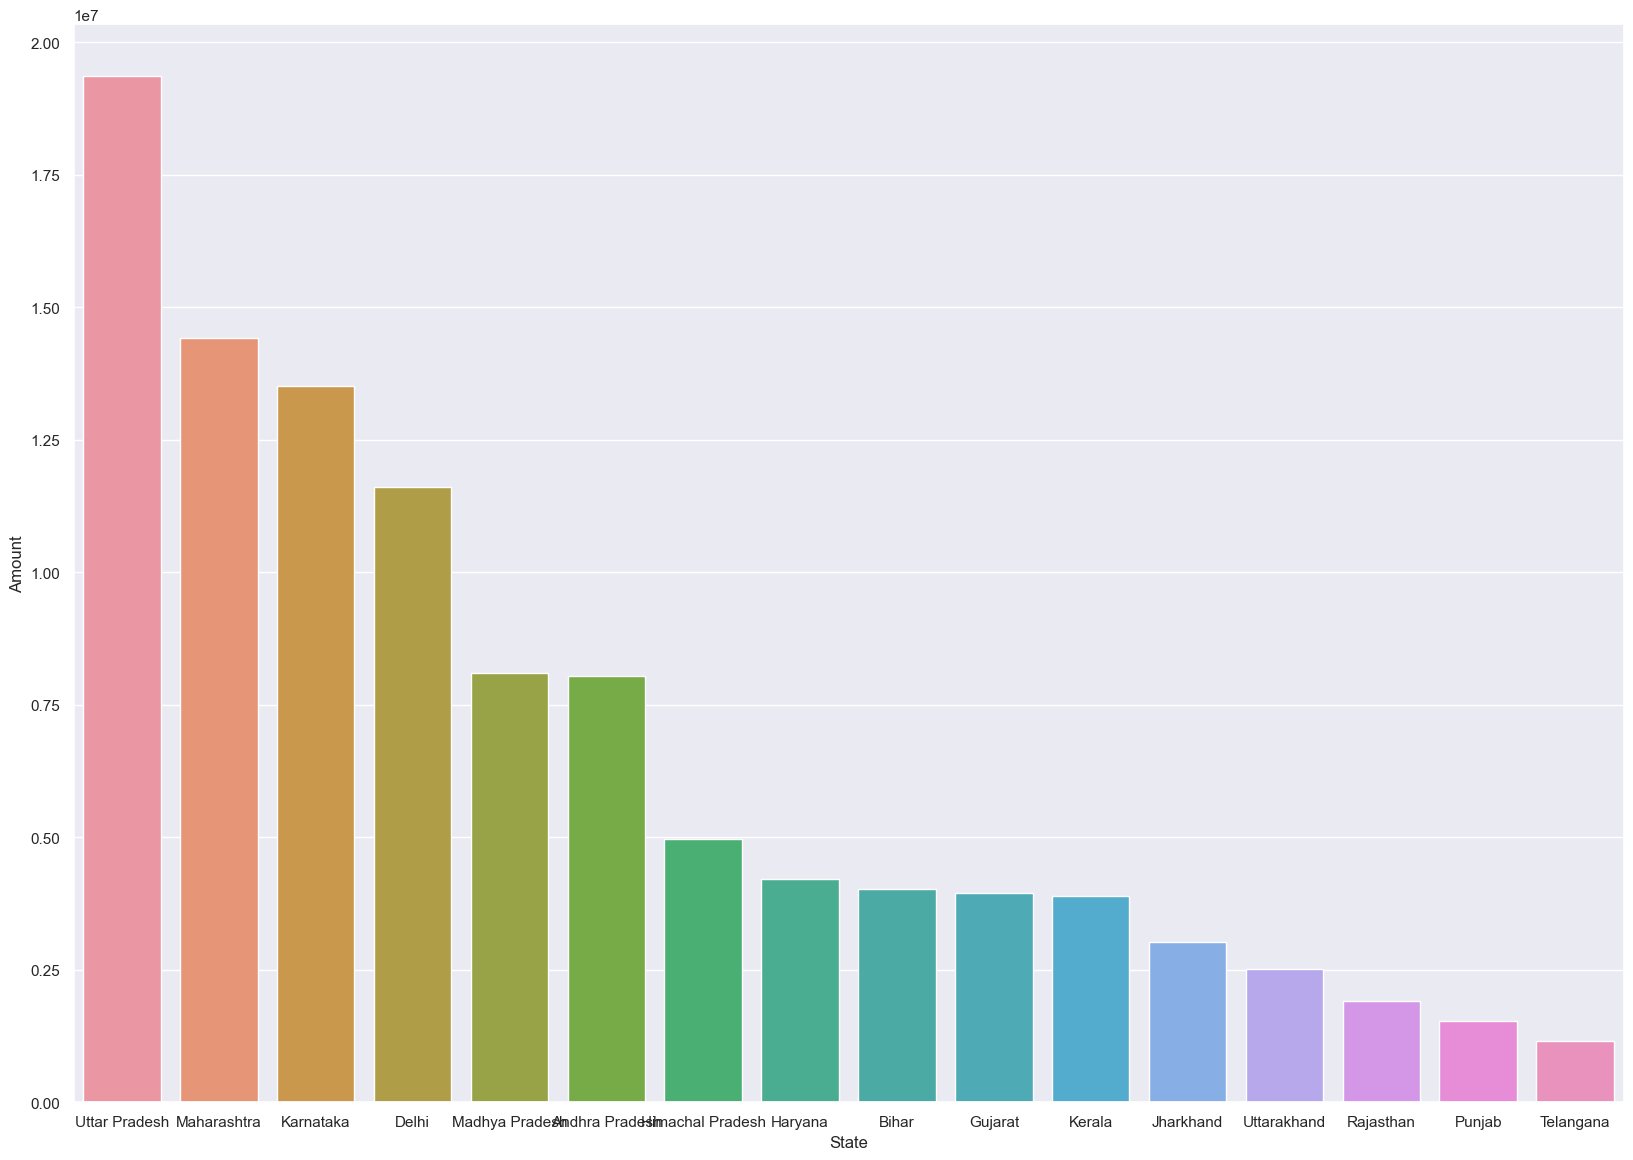

In [18]:
state_sales= df_sales.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc={'figure.figsize':(20,14)})
sns.barplot(x='State' , y = 'Amount',data = state_sales)

In [19]:
# we see that In terms of amount U.P purchase is highest among all the states.
# Now Question comes- Which State people place the maximum orders ?

<Axes: xlabel='State', ylabel='Orders'>

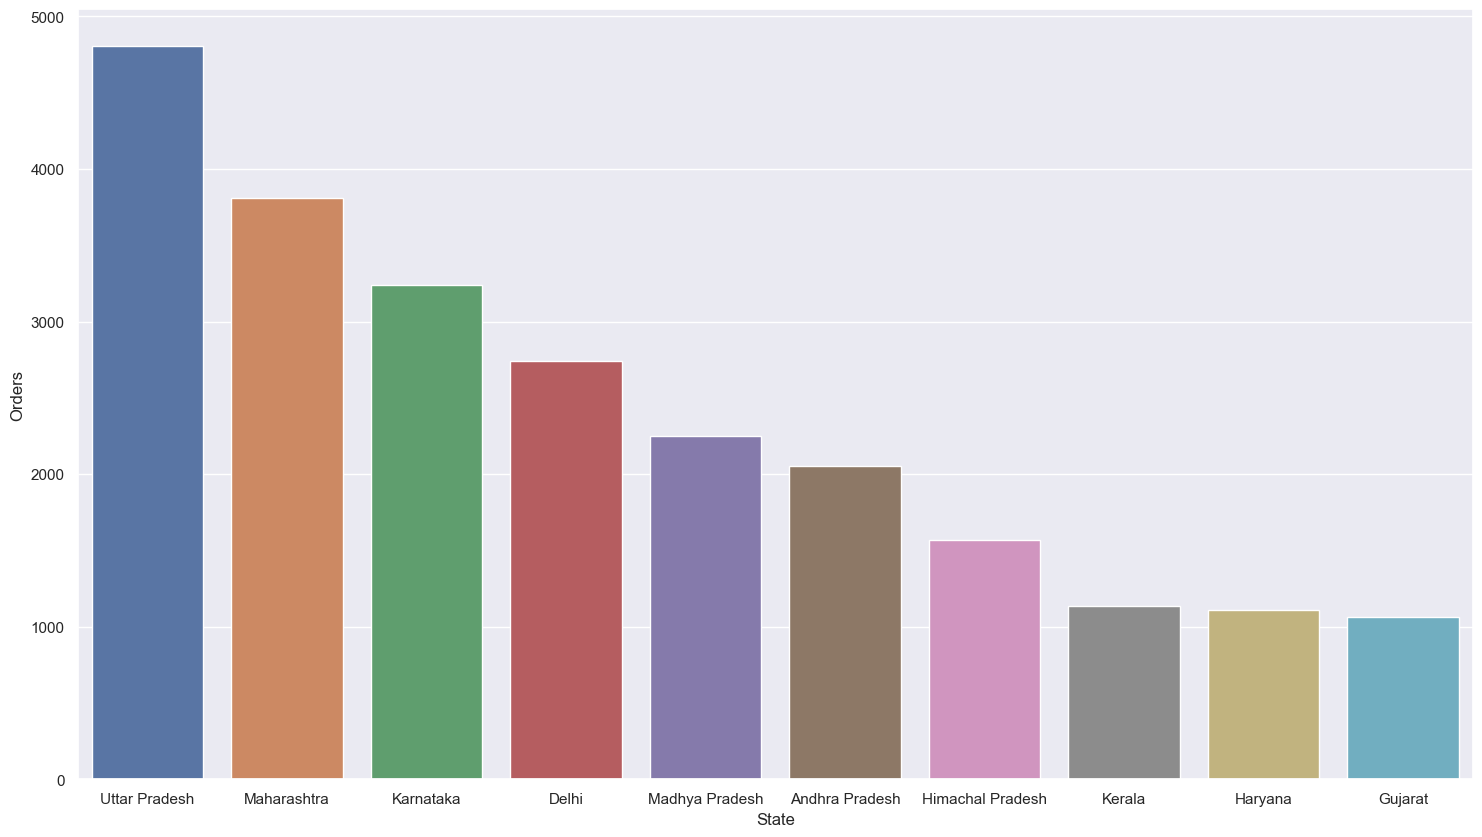

In [20]:
state_orders= df_sales.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by ='Orders',ascending = False).head(10)
sns.set(rc={'figure.figsize':(18,10)})
sns.barplot(x='State', y= 'Orders', data = state_orders)
# plt.title('State Vs Orders')                          
                                                             
                                                             

In [21]:
# So In terms of order , Uttar Pradesh placed highest order

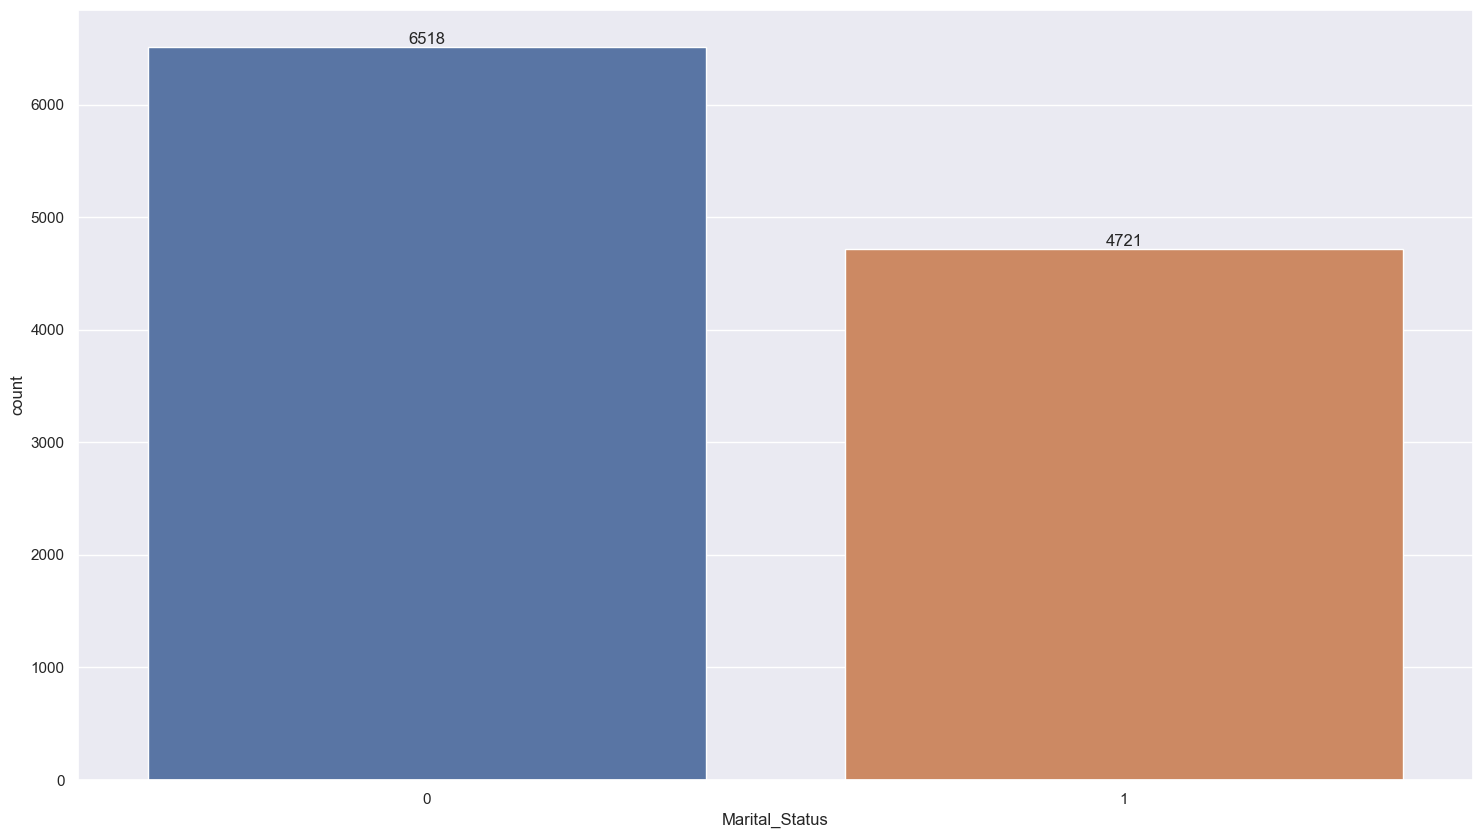

In [22]:
ax = sns.countplot(x='Marital_Status', data = df_sales)
for bars in ax.containers:
    ax.bar_label(bars)
 # 0- Unmarried and 1- Married   


<Axes: xlabel='Marital_Status', ylabel='Amount'>

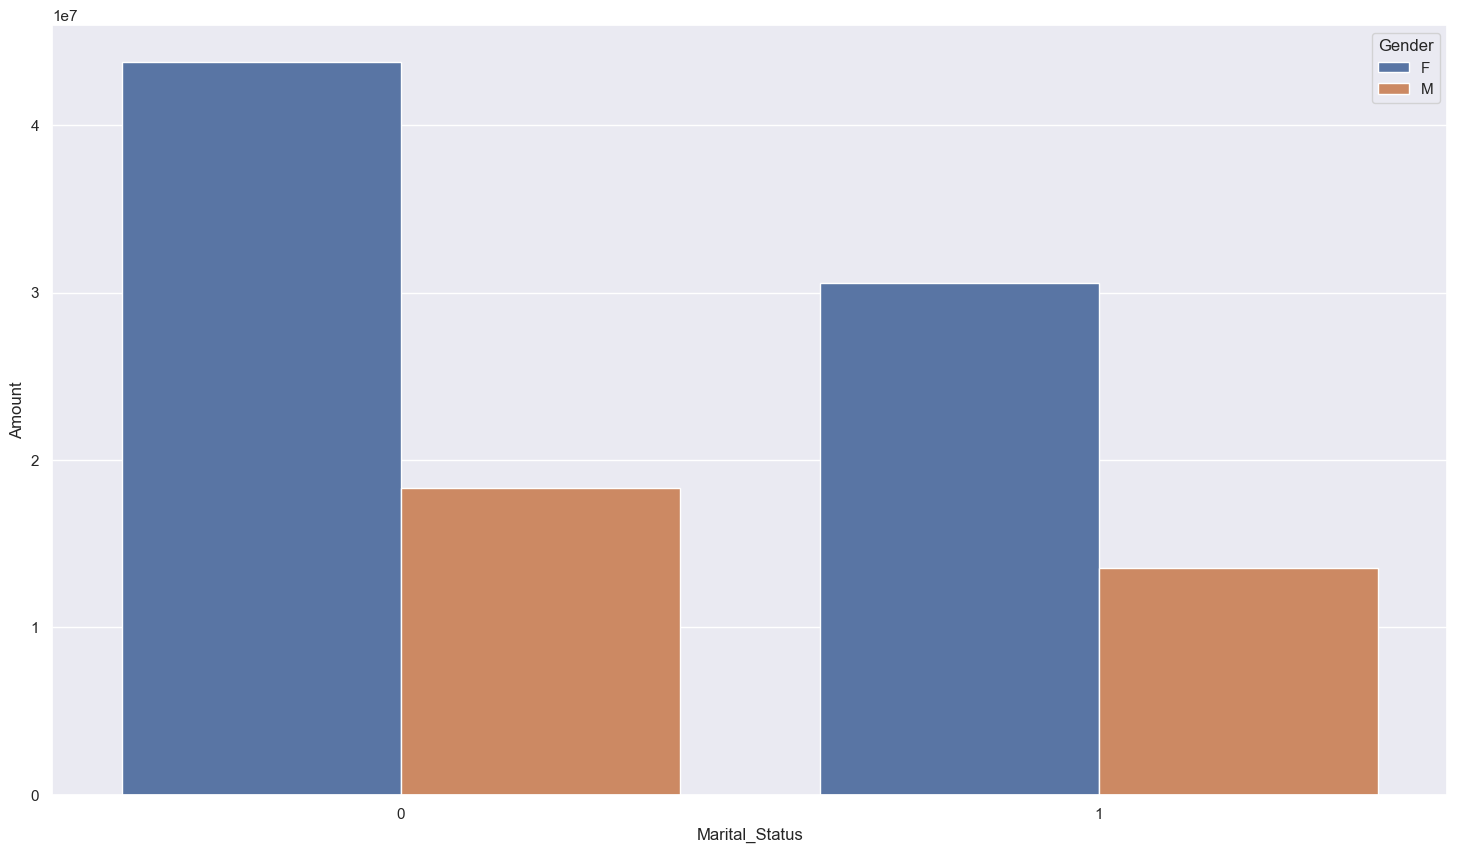

In [23]:
sales = df_sales.groupby(['Marital_Status','Gender'],as_index =False) ['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='Marital_Status', y= 'Amount', data = sales, hue ='Gender' )

In [24]:
#Unmarried Females and Males do more purchasing then "Married"
# Unmarried Females-have the highest purchasing Power

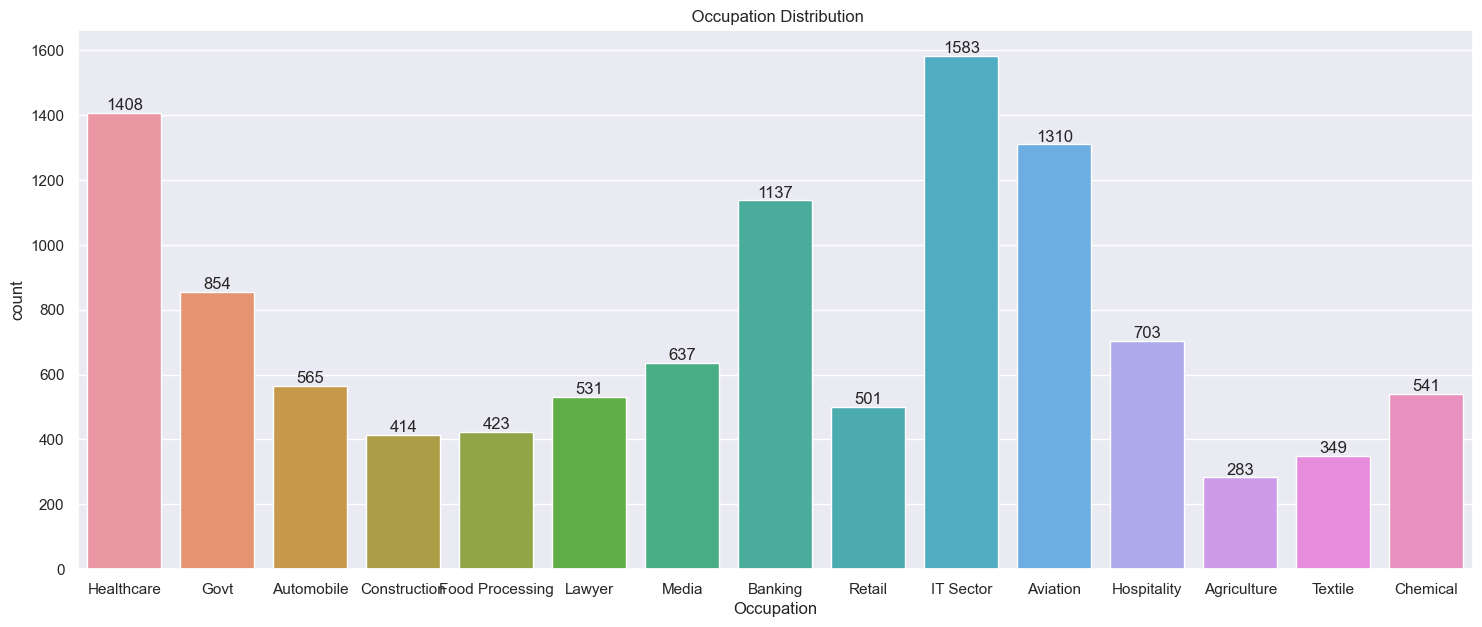

In [25]:
#From which sector of occupation do more purchasing 
sns.set(rc={'figure.figsize':(18,7)})
ax= sns.countplot(x ='Occupation', data = df_sales)
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title(' Occupation Distribution')

In [26]:
# AS from above BarGraph, IT sector people's have most purchasing power , then followed by HealthCare Sector , and least is done by Agriculture sector


In [27]:
# Now Question comes, In Terms of Amount which Sector does the most purchaising power 

<Axes: xlabel='Occupation', ylabel='Amount'>

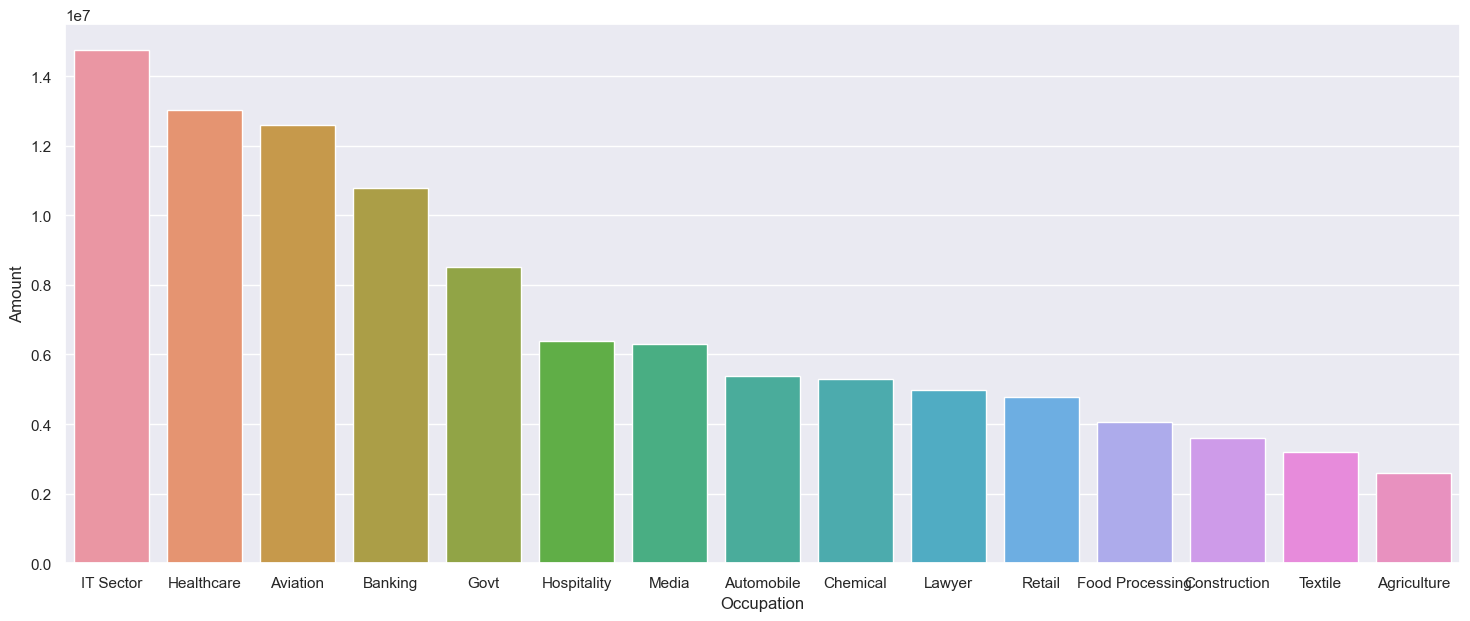

In [28]:
sales_sector = df_sales.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x= 'Occupation', y= 'Amount', data = sales_sector)

In [29]:
#In Terms of Amount, IT sector does the highest purchasing power than other sector.

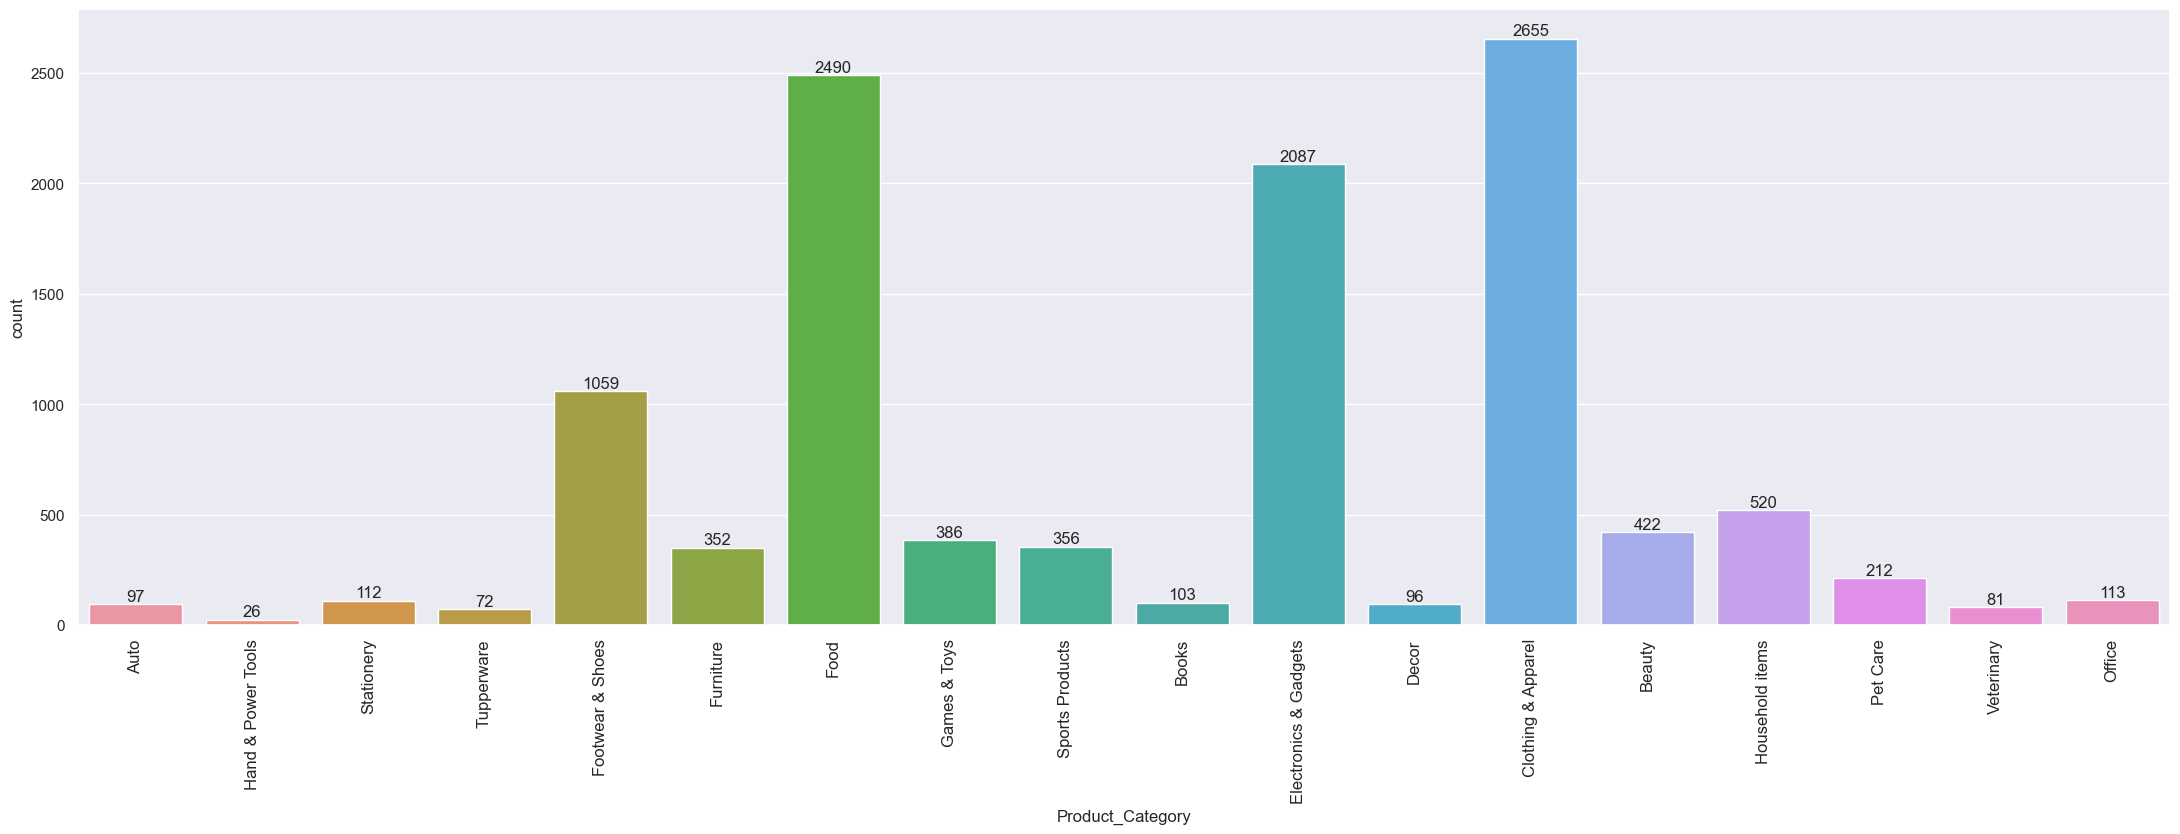

In [60]:
sns.set(rc={'figure.figsize':(27,8)})
plt.xticks(rotation = 'vertical',fontsize = 12)
ax = sns.countplot( x ='Product_Category' , data = df_sales)
for bars in ax.containers:
    ax.bar_label(bars)

In [38]:
 # The product has most selled is Clothing and Apparel, then Food , and then Electronics and Gadget

<Axes: xlabel='Product_Category', ylabel='Amount'>

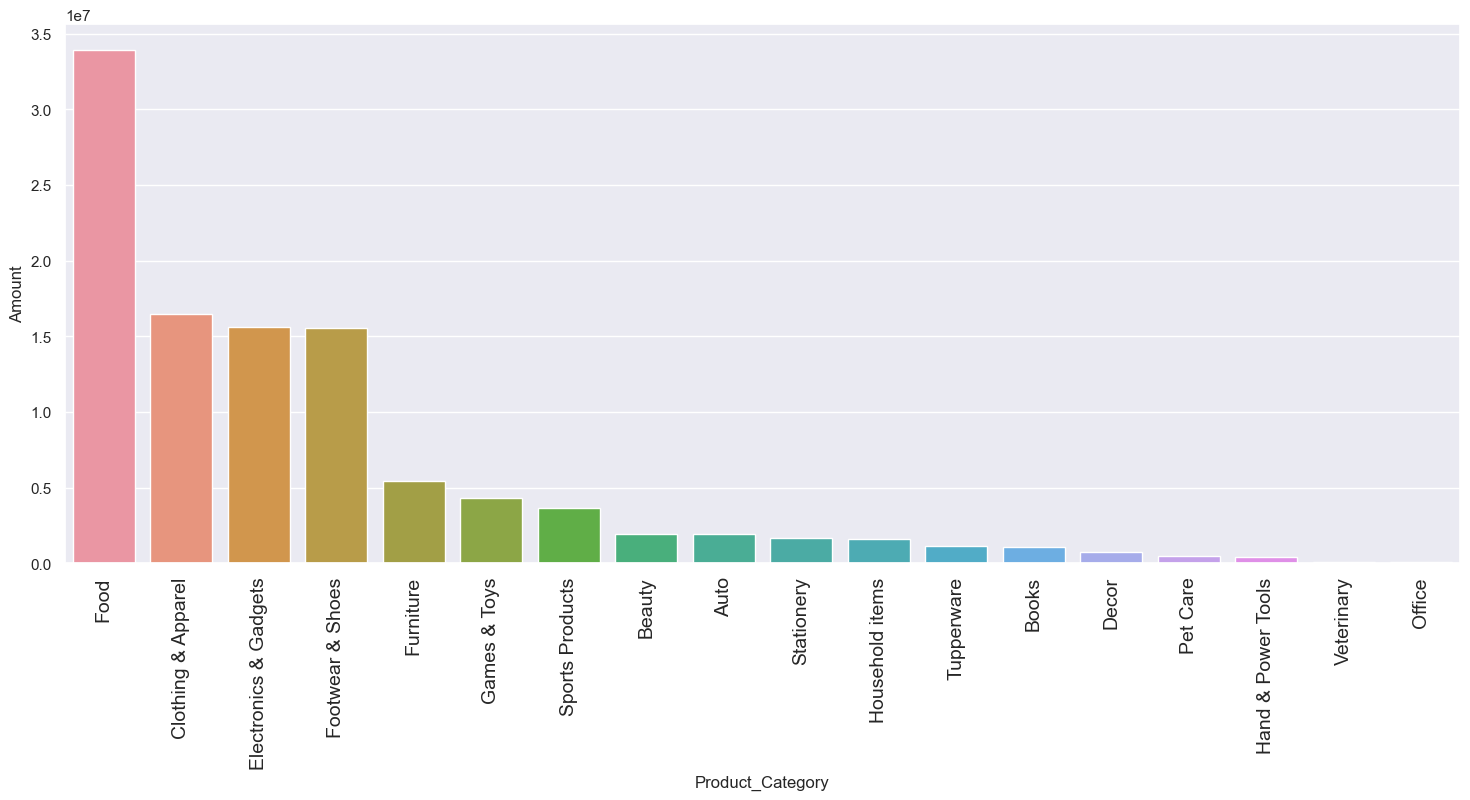

In [59]:
sales_product = df_sales.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by ='Amount', ascending = False)
sns.set(rc ={'figure.figsize':(18,7)})
plt.xticks(rotation='vertical',fontsize=14)
sns.barplot(x ='Product_Category', y = 'Amount', data = sales_product)

In [46]:
# The most selled Product is food 

<Axes: xlabel='Product_ID', ylabel='Orders'>

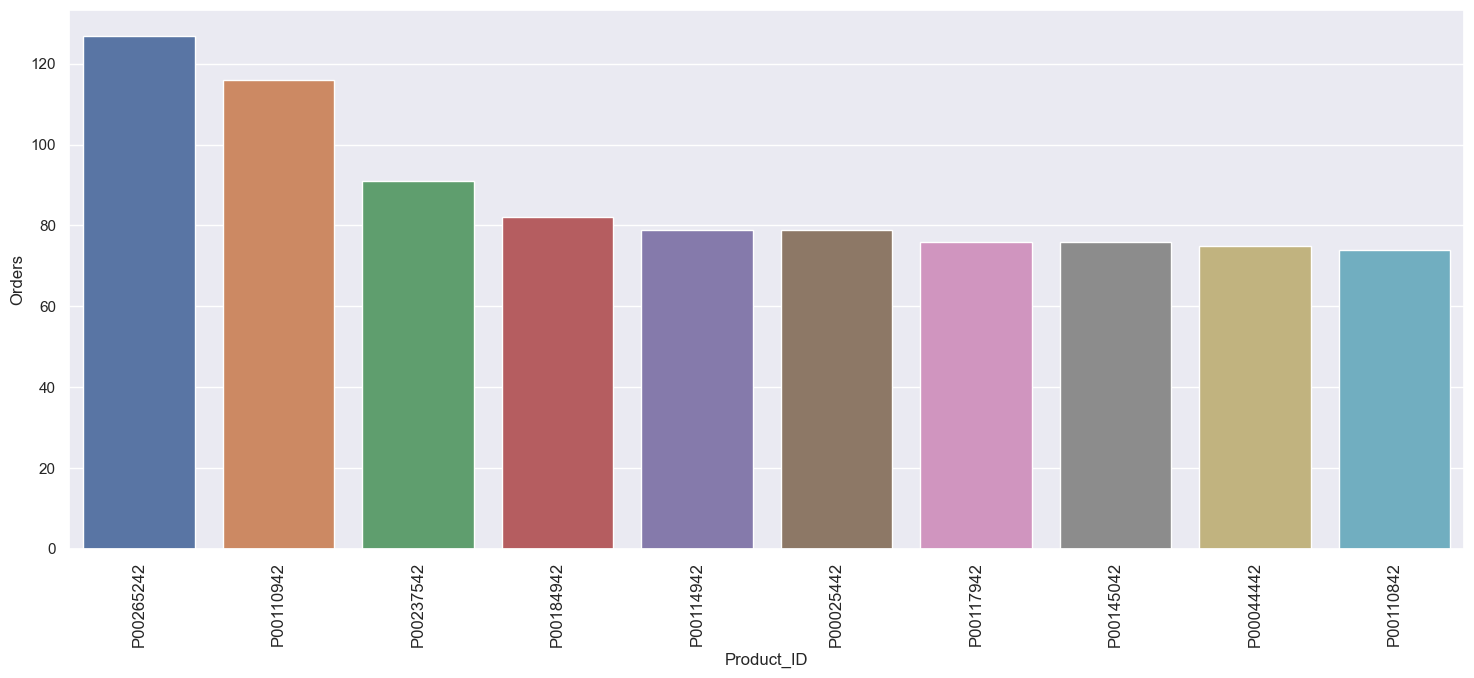

In [58]:
sales_product = df_sales.groupby(['Product_ID'],as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc ={'figure.figsize':(18,7)})
plt.xticks(rotation ='vertical',fontsize = 12)
sns.barplot(x='Product_ID', y='Orders', data = sales_product)

In [ ]:
##CONCLUSION -- The most common product categories that unmarried women in the 26–35 age range from Uttar Pradesh, Maharashtra,
#and Karnataka who work in IT, healthcare, and aviation are likely to purchase are food, apparel, and electronics.